# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [10]:
import pandas as pd

In [11]:
# 학습/평가 데이터 로딩
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [13]:
y_train

,target
0,37613.476712
1,37646.361725
2,37068.827046
3,35338.538679
4,35241.377033
...,...
1818,35818.511192
1819,35554.590196
1820,35626.662900
1821,35385.912696


In [7]:
x_train

,weekday,month,shift1,shift2,shift3,rolling3
0,2.0,1.0,37872.095279,37702.314204,35344.252200,36972.887228
1,3.0,1.0,37613.476712,37872.095279,37702.314204,37729.295399
2,4.0,1.0,37646.361725,37613.476712,37872.095279,37710.644572
3,5.0,1.0,37068.827046,37646.361725,37613.476712,37442.888494
4,6.0,1.0,35338.538679,37068.827046,37646.361725,36684.575817
...,...,...,...,...,...,...
1818,0.0,12.0,35005.439479,33596.164675,35526.181642,34709.261932
1819,1.0,12.0,35818.511192,35005.439479,33596.164675,34806.705115
1820,2.0,12.0,35554.590196,35818.511192,35005.439479,35459.513622
1821,3.0,12.0,35626.662900,35554.590196,35818.511192,35666.588096


In [14]:
# 아래에 실습코드를 작성하세요.
LR = LinearRegression()
LR.fit(x_train, y_train)

# 예측 수행
y_pred = LR.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 987.5484780613307
R-squared Score: 0.6808238042778301


### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [16]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 학습
RF = RandomForestRegressor()
RF.fit(x_train, y_train.values.ravel())

# 예측 수행
y_pred = RF.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 691.0670150876481
R-squared Score: 0.8437018006191036


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

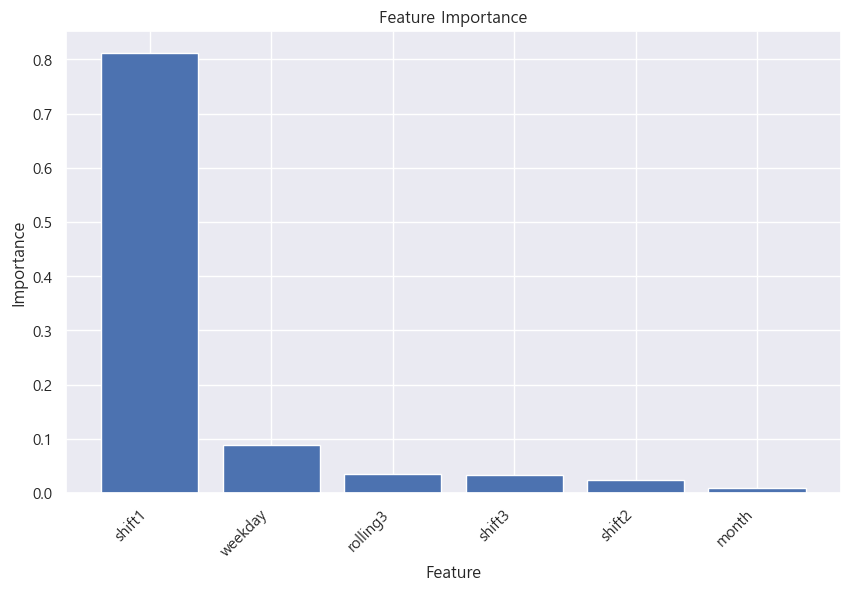

In [17]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt

importances = RF.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

 98%|===================| 1794/1823 [00:42<00:00]        

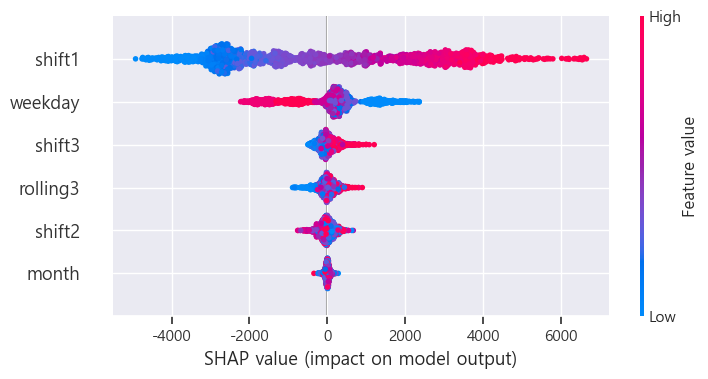

In [21]:
import shap

explainer = shap.Explainer(RF, x_train)
shap_values = explainer(x_train)


shap.plots.beeswarm(shap_values)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [22]:
# 아래에 실습코드를 작성하세요.
from xgboost import XGBRegressor, plot_tree, plot_importance
import numpy as np

XGB = XGBRegressor(objective='reg:squarederror')
XGB.fit(x_train, y_train)

# 예측 수행
y_pred = XGB.predict(x_test)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

RMSE: 706.7250622544768
R-squared Score: 0.8365388193168275


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

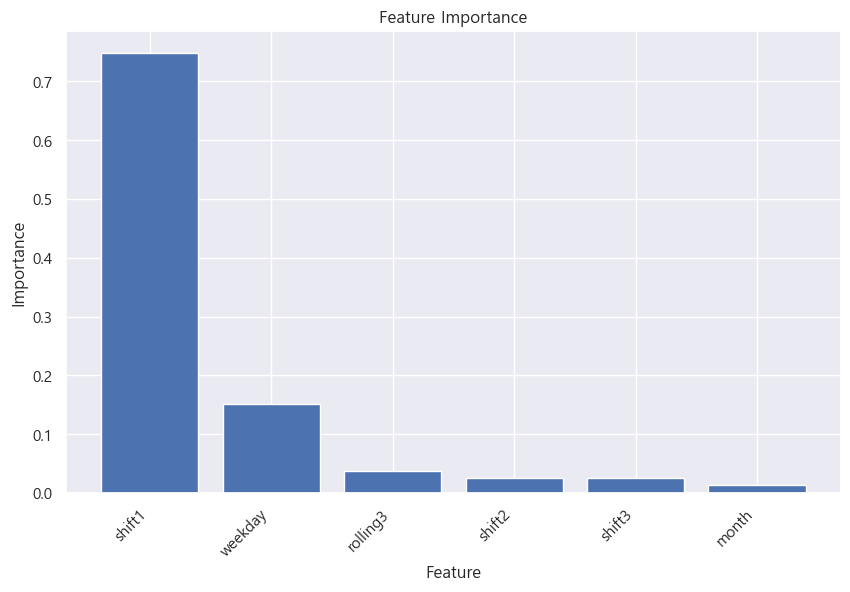

In [23]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt

importances = XGB.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


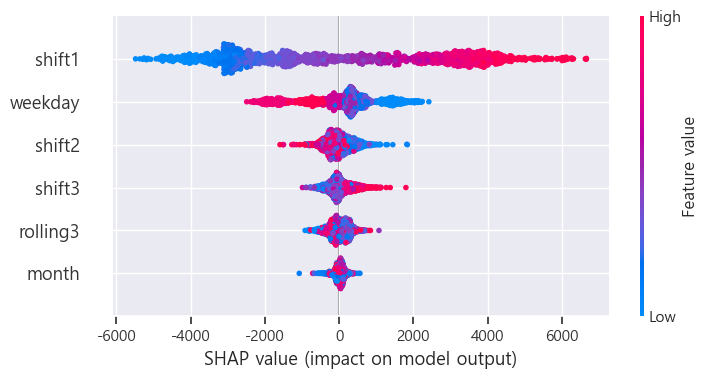

In [24]:
import shap

explainer = shap.Explainer(XGB, x_train)
shap_values = explainer(x_train)


shap.plots.beeswarm(shap_values)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인




In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [25]:
# 아래에 실습코드를 작성하세요.


,weekday,month,shift1,shift2,shift3,rolling3
0,2.0,1.0,37872.095279,37702.314204,35344.252200,36972.887228
1,3.0,1.0,37613.476712,37872.095279,37702.314204,37729.295399
2,4.0,1.0,37646.361725,37613.476712,37872.095279,37710.644572
3,5.0,1.0,37068.827046,37646.361725,37613.476712,37442.888494
4,6.0,1.0,35338.538679,37068.827046,37646.361725,36684.575817
...,...,...,...,...,...,...
1818,0.0,12.0,35005.439479,33596.164675,35526.181642,34709.261932
1819,1.0,12.0,35818.511192,35005.439479,33596.164675,34806.705115
1820,2.0,12.0,35554.590196,35818.511192,35005.439479,35459.513622
1821,3.0,12.0,35626.662900,35554.590196,35818.511192,35666.588096


In [33]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

sca = MinMaxScaler()
x_train_sca = sca.fit_transform(x_train)
x_test_sca = sca.transform(x_test)

y_sca = MinMaxScaler()
y_train_sca = y_sca.fit_transform(y_train)
y_test_sca = y_sca.transform(y_test)

---

# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [37]:
# 아래에 실습코드를 작성하세요.
import tensorflow as tf

X = tf.keras.Input(shape=[x_train_sca.shape[1]])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)

H = tf.keras.layers.Dense(61)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)

Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.Model(X, Y)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 flatten_2 (Flatten)         (None, 6)                 0         
                                                                 
 dense_10 (Dense)            (None, 64)                448       
                                                                 
 batch_normalization_8 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 64)                0         
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                           

In [38]:
# 아래에 실습코드를 작성하세요.
model.fit(x_train_sca, y_train_sca, epochs=100)

Epoch 1/100


57/57 [==============================] - 2s 3ms/step - loss: 1.2889
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8007
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.4903
Epoch 4/100
57/57 [==============================] - 0s 3ms/step - loss: 0.4000
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2674
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.2254
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.1597
Epoch 8/100
57/57 [==============================] - 0s 4ms/step - loss: 0.1229
Epoch 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0929
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0868
Epoch 11/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 12/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0591
Epoch 13/100
57/57 [=============================

In [39]:
# 아래에 실습코드를 작성하세요.
y_pred = model.predict(x_test_sca)
y_pred = y_sca.inverse_transform(y_pred)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

18/18 [==============================] - 0s 2ms/step
RMSE: 960.6789324814002
R-squared Score: 0.6979560232652262
